In [27]:
#Import pustaka yang dibutuhkan
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#warning
from warnings import filterwarnings
filterwarnings('ignore')

In [28]:
#Data Loading & Exploratory Data Analysis
df = pd.read_csv('/content/titanic.csv')
df_test = pd.read_csv('/content/titanic_test.csv')
df_full = [df, df_test]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"1,0,3,""Braund, Mr. Owen Harris"",male,22,1,0,A/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,1,1,""Cumings, Mrs. John Bradley (Florence Br...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"3,1,3,""Heikkinen, Miss. Laina"",female,26,0,0,S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4,1,1,""Futrelle, Mrs. Jacques Heath (Lily May ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"5,0,3,""Allen, Mr. William Henry"",male,35,0,0,3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Age distribution')

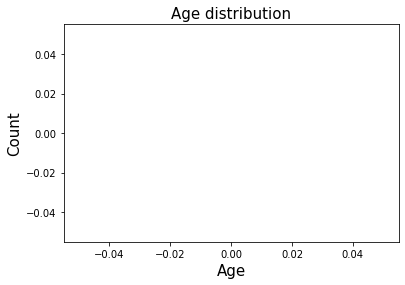

In [29]:
sns.distplot(df['Age'])
plt.xlabel("Age", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age distribution', fontsize=15)

In [ ]:
sns.distplot(df['Pclass'])
plt.xlabel("Pclass", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Class distribution', fontsize=15)

In [ ]:
sns.distplot(df['Fare'])
plt.xlabel("Fare", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Fare distribution', fontsize=15)

In [31]:
df_test['Embarked'].mode()

Series([], dtype: float64)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     0 non-null      float64
 2   Pclass       0 non-null      float64
 3   Name         0 non-null      float64
 4   Sex          0 non-null      float64
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      float64
 7   Parch        0 non-null      float64
 8   Ticket       0 non-null      float64
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      float64
 11  Embarked     0 non-null      float64
dtypes: float64(11), object(1)
memory usage: 83.7+ KB


Empty DataFrame
Columns: [Pclass, Survived]
Index: []


IndexError: ignored

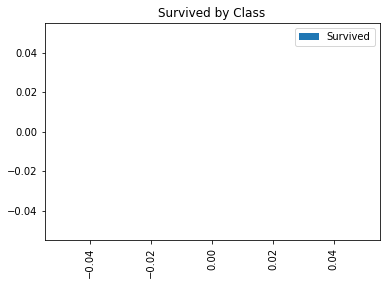

In [32]:
#Explore each column
#Pclass
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
ax = (df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()).plot.bar(
    title = 'Survived by Class')

ax.set_ylabel('%')
ax.set_xlabel('Class')

In [ ]:
print(df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())
ax = (df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()).plot.bar(
    title = 'Survived by Gender')

ax.set_ylabel('%')
ax.set_xlabel('Gender')

In [ ]:
#FamilySize
for dataset in df_full:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:
print(df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
ax = (df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean()).plot.bar(
    title = 'Survived by Family Members')

ax.set_ylabel('%')
ax.set_xlabel('Sum of Family Members')

In [ ]:
#isAlone
for dataset in df_full:
  dataset['isAlone'] = 0
  dataset.loc[dataset['FamilySize']==1, 'isAlone'] = 1

In [ ]:
print(df[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean())
ax =(df[['isAlone', 'Survived']].groupby(['isAlone'], as_index=True).mean()).plot.bar(
    title = 'Survived by isAlone')

ax.set_ylabel('%')
ax.set_xlabel('IsAlone')

In [ ]:
#Embarked
for dataset in df_full:
  # mode = dataset['Embarked'].mode()
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
print(df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
ax = (df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()).plot.bar(
    title = 'Survived by Embarked Port')

ax.set_ylabel('%')
ax.set_xlabel('Embarked Port')

In [ ]:
#Fare
for dataset in df_full:
  # mean = dataset['Fare'].mean()
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['CategoricalFare'] = pd.qcut(dataset['Fare'], 4)

In [ ]:
print(df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())
ax=(df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=True).mean()).plot.bar(
    title = 'Survived by Categorical Fare')

ax.set_ylabel('%')
ax.set_xlabel('Categorical Fare')

In [ ]:
#Age
for dataset in df_full:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['CategoricalAge'] = pd.cut(dataset['Age'], 5)

In [ ]:
print(df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

ax = (df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=True).mean()).plot.bar(
    title = 'Survived by Categorical Age')

ax.set_ylabel('%')
ax.set_xlabel('Categorical Age')

In [ ]:
#Name
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	if title_search:
		return title_search.group(1)
	return ""

for dataset in df_full:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(df['Title'], df['Sex']))

In [ ]:
for dataset in df_full:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
ax =(df[['Title', 'Survived']].groupby(['Title'], as_index=True).mean()).plot.bar(
    title = 'Survived by Title')

ax.set_ylabel('%')
ax.set_xlabel('Title')

In [ ]:
df

In [ ]:
df_test

In [ ]:
for dataset in df_full:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} )
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						                  = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							                    = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					               = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
df = df.drop(drop_elements, axis = 1)
df = df.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

df_test  = df_test.drop(drop_elements, axis = 1)
df_test = df_test.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

print(df.head(10))

train = df.values
test  = df_test.values

In [ ]:
np.nan in df

In [ ]:
#df.to_csv('df.csv', index=False)

In [ ]:
#Data Preprocessing
#Train and evaluate
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	  AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

acc_dict = {}

# for train_index, test_index in sss.split(X, y):
# 	X_train, X_test = X[train_index], X[test_index]
# 	y_train, y_test = y[train_index], y[test_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
	
for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf]
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [ ]:
np.isnan(df.any())

In [ ]:
#Hyperparameter Tuning

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':np.arange(5,60), 'weights':['uniform', 'distance']}
gscv = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='roc_auc')

gscv.fit(X_train, y_train)

In [ ]:
gscv.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform')
knn.fit(X, y)
df_test = df_test.fillna(0)
y_pred = knn.predict(df_test)

In [ ]:
df_test.head()

In [ ]:
#Decision Tree Classifier

DTC = DecisionTreeClassifier()
DTC.fit(X, y)
df_test = df_test.fillna(0)
y_pred = DTC.predict(df_test)

In [ ]:
df_test

In [ ]:
df_test['prediction'] = y_pred

In [ ]:
df_test

In [ ]:
df_test.to_csv('hasil_prediksi_test_titanic.csv', index=False)